In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import tqdm


from helpers import generate_embedding
from graph_randomisation import run_parallel_tempering, MCMC_Chain, compute_entropy_mean, infinite_temp_entropy, compute_specific_heat_mean

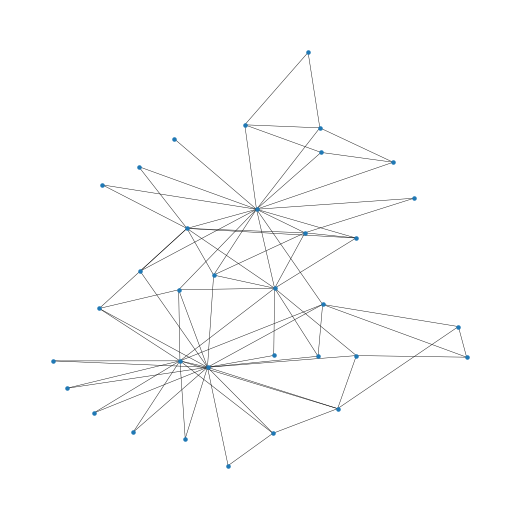

In [3]:
G = nx.karate_club_graph()
for u, v in G.edges():
    G[u][v].clear()

G= nx.convert_node_labels_to_integers(G, first_label=0)
N = len(G.nodes)

positions = nx.kamada_kawai_layout(G)
fig = plt.figure(figsize=(5, 5))
nx.draw(G, pos = positions, node_size=5, width=0.3)

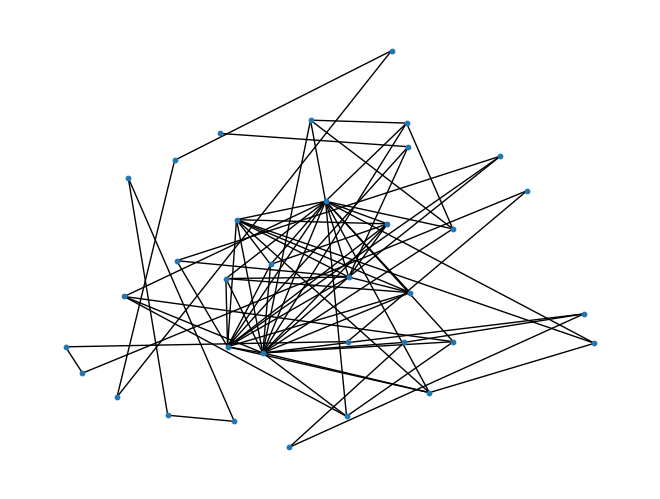

In [5]:
starting_graph = nx.havel_hakimi_graph([degree for node, degree in G.degree()])
nx.draw(starting_graph, pos=positions, node_size=10)

In [55]:
states, minimum_edgelists, min_diffs, diffs_by_temp, samples, betas = run_parallel_tempering(target_graph=G, 
                                                                                             starting_graph=starting_graph, 
                                                                                             n_steps =300000, 
                                                                                             burn_in=200000, 
                                                                                             K = 14, 
                                                                                             directed=False,
                                                                                             alpha=None, 
                                                                                             normalise_embedding=True, 
                                                                                             operation='degree-preserving',
                                                                                             n_states=50,
                                                                                             beta_min = 0,
                                                                                             beta_max=50,
                                                                                             swap_steps=1000,
                                                                                             swap_interval = 1000,
                                                                                             print_outputs=True,
                                                                                             combine_embeddings=False,
                                                                                             sample=True,
                                                                                             betas = None)

22.75810814372498


  0%|▏                                          | 1/300 [00:04<22:02,  4.42s/it]

2.286505658701425


  1%|▎                                          | 2/300 [00:09<22:35,  4.55s/it]

2.071740349578059


  1%|▍                                          | 3/300 [00:13<22:51,  4.62s/it]

1.6301523058779814


  1%|▌                                          | 4/300 [00:18<23:35,  4.78s/it]

1.4848758049446946


  2%|▋                                          | 5/300 [00:23<23:32,  4.79s/it]

1.4581573143282576


  2%|▊                                          | 6/300 [00:28<23:32,  4.80s/it]

1.5037723261626912


  2%|█                                          | 7/300 [00:33<23:36,  4.84s/it]

1.4768051665231399


  3%|█▏                                         | 8/300 [00:38<24:13,  4.98s/it]

1.194902143284985


  3%|█▎                                         | 9/300 [00:43<24:45,  5.11s/it]

1.243200186021057


  3%|█▍                                        | 10/300 [00:49<24:49,  5.14s/it]

1.1667067128141135


  4%|█▌                                        | 11/300 [00:54<24:45,  5.14s/it]

1.1281882019456941


  4%|█▋                                        | 12/300 [00:59<24:41,  5.15s/it]

1.1571031077238554


  4%|█▊                                        | 13/300 [01:05<25:16,  5.28s/it]

0.9953213698468507


  5%|█▉                                        | 14/300 [01:10<25:16,  5.30s/it]

0.9383042916796899


  5%|██                                        | 15/300 [01:15<25:07,  5.29s/it]

0.9114999817003071


  5%|██▏                                       | 16/300 [01:20<24:56,  5.27s/it]

0.8335859360557709


  6%|██▍                                       | 17/300 [01:26<24:44,  5.25s/it]

0.8360559748835674


  6%|██▌                                       | 18/300 [01:31<24:33,  5.22s/it]

0.7842972776987103


  6%|██▋                                       | 19/300 [01:36<24:31,  5.24s/it]

0.7969120687631803


  7%|██▊                                       | 20/300 [01:41<24:24,  5.23s/it]

0.7969120687631803


  7%|██▉                                       | 21/300 [01:47<24:26,  5.26s/it]

0.8107984049955688


  7%|███                                       | 22/300 [01:52<24:55,  5.38s/it]

0.905759828016881


  8%|███▏                                      | 23/300 [01:57<24:36,  5.33s/it]

0.8940488631111092


  8%|███▎                                      | 24/300 [02:03<24:43,  5.37s/it]

0.8289007790748435


  8%|███▌                                      | 25/300 [02:09<25:54,  5.65s/it]

0.8498035817787959


  9%|███▋                                      | 26/300 [02:20<33:08,  7.26s/it]

0.8056762610769712


  9%|███▊                                      | 27/300 [02:27<32:08,  7.06s/it]

0.934233648679464


  9%|███▉                                      | 28/300 [02:34<32:18,  7.13s/it]

0.8704042538793553


 10%|████                                      | 29/300 [02:42<32:57,  7.30s/it]

0.757894500261141


 10%|████▏                                     | 30/300 [02:49<32:46,  7.28s/it]

0.7614390926885439


 10%|████▎                                     | 31/300 [02:57<33:01,  7.37s/it]

0.837009691606569


 11%|████▍                                     | 32/300 [03:06<35:12,  7.88s/it]

0.8442137753689494


 11%|████▌                                     | 33/300 [03:14<35:06,  7.89s/it]

0.7851449847810985


 11%|████▊                                     | 34/300 [03:21<34:10,  7.71s/it]

0.6871472862399759


 12%|████▉                                     | 35/300 [03:28<33:32,  7.59s/it]

0.6254303492658231


 12%|█████                                     | 36/300 [03:35<31:58,  7.27s/it]

0.6543467460558611


 12%|█████▏                                    | 37/300 [03:41<30:52,  7.05s/it]

0.6853855961791058


 13%|█████▎                                    | 38/300 [03:48<30:33,  7.00s/it]

0.6424837372486943


 13%|█████▍                                    | 39/300 [03:55<30:15,  6.95s/it]

0.5876244953846945


 13%|█████▌                                    | 40/300 [04:02<30:02,  6.93s/it]

0.5742587309967098


 14%|█████▋                                    | 41/300 [04:08<29:12,  6.77s/it]

0.38592814762803795


 14%|█████▉                                    | 42/300 [04:15<28:22,  6.60s/it]

0.38592814762803795


 14%|██████                                    | 43/300 [04:21<27:38,  6.45s/it]

0.38592814762803795


 15%|██████▏                                   | 44/300 [04:27<27:22,  6.42s/it]

0.38592814762803795


 15%|██████▎                                   | 45/300 [04:34<27:58,  6.58s/it]

0.38592814762803795


 15%|██████▍                                   | 46/300 [04:40<26:59,  6.38s/it]

0.38592814762803795


 16%|██████▌                                   | 47/300 [04:46<26:17,  6.23s/it]

0.38592814762803795


 16%|██████▋                                   | 48/300 [04:52<26:02,  6.20s/it]

0.38592814762803795


 16%|██████▊                                   | 49/300 [04:58<26:01,  6.22s/it]

0.4427703197697045


 17%|███████                                   | 50/300 [05:05<26:15,  6.30s/it]

0.38592814762803795


 17%|███████▏                                  | 51/300 [05:11<26:19,  6.34s/it]

0.38592814762803795


 17%|███████▎                                  | 52/300 [05:18<26:21,  6.38s/it]

0.38592814762803795


 18%|███████▍                                  | 53/300 [05:24<26:42,  6.49s/it]

0.38592814762803795


 18%|███████▌                                  | 54/300 [05:31<27:07,  6.61s/it]

0.3060888143076562


 18%|███████▋                                  | 55/300 [05:38<27:16,  6.68s/it]

0.33632377092944604


 19%|███████▊                                  | 56/300 [05:45<27:01,  6.64s/it]

0.1666490911068149


 19%|███████▉                                  | 57/300 [05:51<26:44,  6.60s/it]

0.1666490911068149


 19%|████████                                  | 58/300 [05:58<27:04,  6.71s/it]

0.09998242444014831


 20%|████████▎                                 | 59/300 [06:05<26:52,  6.69s/it]

0.09998242444014835


 20%|████████▍                                 | 60/300 [06:11<26:39,  6.66s/it]

0.09998242444014835


 20%|████████▌                                 | 61/300 [06:18<26:48,  6.73s/it]

0.09998242444014835


 21%|████████▋                                 | 62/300 [06:25<26:50,  6.77s/it]

0.09998242444014835


 21%|████████▊                                 | 63/300 [06:32<26:25,  6.69s/it]

0.09998242444014831


 21%|████████▉                                 | 64/300 [06:39<26:59,  6.86s/it]

0.19729431975455822


 22%|█████████                                 | 65/300 [06:51<33:14,  8.49s/it]

0.09998242444014831


 22%|█████████▏                                | 66/300 [07:03<37:00,  9.49s/it]

0.09998242444014835


 22%|█████████▍                                | 67/300 [07:14<39:16, 10.11s/it]

0.09998242444014831


 23%|█████████▌                                | 68/300 [07:21<34:47,  9.00s/it]

0.09998242444014831


 23%|█████████▋                                | 69/300 [07:28<31:59,  8.31s/it]

0.09998242444014831


 23%|█████████▊                                | 70/300 [07:34<30:02,  7.84s/it]

0.09998242444014831


 24%|█████████▉                                | 71/300 [07:41<28:31,  7.48s/it]

0.09998242444014831


 24%|██████████                                | 72/300 [07:48<27:45,  7.31s/it]

0.09998242444014831


 24%|██████████▏                               | 73/300 [07:54<26:54,  7.11s/it]

0.09998242444014831


 25%|██████████▎                               | 74/300 [08:01<25:40,  6.82s/it]

0.09998242444014831


 25%|██████████▌                               | 75/300 [08:07<25:11,  6.72s/it]

0.09998242444014831


 25%|██████████▋                               | 76/300 [08:14<25:18,  6.78s/it]

0.09998242444014835


 26%|██████████▊                               | 77/300 [08:21<25:43,  6.92s/it]

0.09998242444014835


 26%|██████████▉                               | 78/300 [08:33<30:23,  8.22s/it]

0.09998242444014835


 26%|███████████                               | 79/300 [08:43<32:14,  8.75s/it]

0.09998242444014835


 27%|███████████▏                              | 80/300 [08:50<30:34,  8.34s/it]

0.09998242444014831


 27%|███████████▎                              | 81/300 [08:57<29:07,  7.98s/it]

0.09998242444014831


 27%|███████████▍                              | 82/300 [09:04<27:40,  7.62s/it]

0.09998242444014835


 28%|███████████▌                              | 83/300 [09:11<26:43,  7.39s/it]

0.09998242444014835


 28%|███████████▊                              | 84/300 [09:17<25:45,  7.15s/it]

0.09998242444014835


 28%|███████████▉                              | 85/300 [09:24<25:13,  7.04s/it]

0.09998242444014835


 29%|████████████                              | 86/300 [09:32<25:41,  7.20s/it]

0.09998242444014835


 29%|████████████▏                             | 87/300 [09:38<24:49,  6.99s/it]

0.09998242444014831


 29%|████████████▎                             | 88/300 [09:45<24:07,  6.83s/it]

0.09998242444014835


 30%|████████████▍                             | 89/300 [09:52<24:39,  7.01s/it]

0.09998242444014831


 30%|████████████▌                             | 90/300 [10:00<25:25,  7.27s/it]

0.09998242444014831


 30%|████████████▋                             | 91/300 [10:07<25:07,  7.21s/it]

0.09998242444014835


 31%|████████████▉                             | 92/300 [10:14<24:46,  7.15s/it]

0.09998242444014831


 31%|█████████████                             | 93/300 [10:20<23:53,  6.92s/it]

4.683753385137379e-17


 31%|█████████████▏                            | 94/300 [10:27<23:35,  6.87s/it]

4.683753385137379e-17


 32%|█████████████▎                            | 95/300 [10:34<23:20,  6.83s/it]

0.0


 32%|█████████████▍                            | 96/300 [10:45<27:32,  8.10s/it]

4.683753385137379e-17


 32%|█████████████▌                            | 97/300 [10:58<32:01,  9.46s/it]

4.683753385137379e-17


 33%|█████████████▋                            | 98/300 [11:06<30:57,  9.20s/it]

4.683753385137379e-17


 33%|█████████████▊                            | 99/300 [11:12<27:54,  8.33s/it]

4.683753385137379e-17


 33%|█████████████▋                           | 100/300 [11:19<25:41,  7.71s/it]

0.0


 34%|█████████████▊                           | 101/300 [11:25<24:04,  7.26s/it]

0.0


 34%|█████████████▉                           | 102/300 [11:32<23:35,  7.15s/it]

0.0


 34%|██████████████                           | 103/300 [11:41<25:01,  7.62s/it]

0.0


 35%|██████████████▏                          | 104/300 [11:48<24:24,  7.47s/it]

4.683753385137379e-17


 35%|██████████████▎                          | 105/300 [11:55<24:17,  7.47s/it]

0.0


 35%|██████████████▍                          | 106/300 [12:02<23:47,  7.36s/it]

0.0


 36%|██████████████▌                          | 107/300 [12:08<22:24,  6.97s/it]

0.0


 36%|██████████████▊                          | 108/300 [12:15<21:50,  6.83s/it]

4.683753385137379e-17


 36%|██████████████▉                          | 109/300 [12:22<21:39,  6.81s/it]

0.0858446708352017


 37%|███████████████                          | 110/300 [12:28<21:20,  6.74s/it]

0.0858446708352017


 37%|███████████████▏                         | 111/300 [12:35<21:20,  6.78s/it]

4.683753385137379e-17


 37%|███████████████▎                         | 112/300 [12:42<21:24,  6.83s/it]

4.683753385137379e-17


 38%|███████████████▍                         | 113/300 [12:49<21:10,  6.80s/it]

4.683753385137379e-17


 38%|███████████████▌                         | 114/300 [12:55<20:54,  6.75s/it]

4.683753385137379e-17


 38%|███████████████▋                         | 115/300 [13:02<20:30,  6.65s/it]

4.683753385137379e-17


 39%|███████████████▊                         | 116/300 [13:09<20:58,  6.84s/it]

4.683753385137379e-17


 39%|███████████████▉                         | 117/300 [13:16<21:00,  6.89s/it]

0.0


 39%|████████████████▏                        | 118/300 [13:23<20:56,  6.90s/it]

4.683753385137379e-17


 40%|████████████████▎                        | 119/300 [13:30<20:38,  6.84s/it]

4.683753385137379e-17


 40%|████████████████▍                        | 120/300 [13:36<20:13,  6.74s/it]

4.683753385137379e-17


 40%|████████████████▌                        | 121/300 [13:43<19:52,  6.66s/it]

0.0


 41%|████████████████▋                        | 122/300 [13:49<19:36,  6.61s/it]

4.683753385137379e-17


 41%|████████████████▊                        | 123/300 [13:56<19:41,  6.68s/it]

0.0


 41%|████████████████▉                        | 124/300 [14:02<19:10,  6.54s/it]

4.683753385137379e-17


 42%|█████████████████                        | 125/300 [14:09<18:57,  6.50s/it]

0.0


 42%|█████████████████▏                       | 126/300 [14:15<18:49,  6.49s/it]

0.0


 42%|█████████████████▎                       | 127/300 [14:22<18:50,  6.54s/it]

0.0


 43%|█████████████████▍                       | 128/300 [14:28<18:48,  6.56s/it]

0.0


 43%|█████████████████▋                       | 129/300 [14:35<19:00,  6.67s/it]

0.0


 43%|█████████████████▊                       | 130/300 [14:42<18:41,  6.60s/it]

4.683753385137379e-17


 44%|█████████████████▉                       | 131/300 [14:49<18:49,  6.68s/it]

4.683753385137379e-17


 44%|██████████████████                       | 132/300 [14:56<19:29,  6.96s/it]

4.683753385137379e-17


 44%|██████████████████▏                      | 133/300 [15:04<19:51,  7.13s/it]

4.683753385137379e-17


 45%|██████████████████▎                      | 134/300 [15:11<19:37,  7.10s/it]

0.0


 45%|██████████████████▍                      | 135/300 [15:19<20:25,  7.43s/it]

0.0


 45%|██████████████████▌                      | 136/300 [15:26<20:20,  7.44s/it]

0.0


 46%|██████████████████▋                      | 137/300 [15:33<19:51,  7.31s/it]

0.0


 46%|██████████████████▊                      | 138/300 [15:44<22:39,  8.39s/it]

0.0


 46%|██████████████████▉                      | 139/300 [15:51<21:02,  7.84s/it]

0.0


 47%|███████████████████▏                     | 140/300 [15:57<19:40,  7.38s/it]

0.0


 47%|███████████████████▎                     | 141/300 [16:03<18:41,  7.05s/it]

4.683753385137379e-17


 47%|███████████████████▍                     | 142/300 [16:10<17:57,  6.82s/it]

0.0


 48%|███████████████████▌                     | 143/300 [16:16<17:40,  6.76s/it]

4.683753385137379e-17


 48%|███████████████████▋                     | 144/300 [16:27<20:44,  7.98s/it]

4.683753385137379e-17


 48%|███████████████████▊                     | 145/300 [16:38<23:01,  8.92s/it]

4.683753385137379e-17


 49%|███████████████████▉                     | 146/300 [16:46<21:42,  8.46s/it]

4.683753385137379e-17


 49%|████████████████████                     | 147/300 [16:52<19:57,  7.83s/it]

4.683753385137379e-17


 49%|████████████████████▏                    | 148/300 [16:59<18:55,  7.47s/it]

4.683753385137379e-17


 50%|████████████████████▎                    | 149/300 [17:05<18:15,  7.26s/it]

0.0


 50%|████████████████████▌                    | 150/300 [17:12<17:47,  7.12s/it]

4.683753385137379e-17


 50%|████████████████████▋                    | 151/300 [17:19<17:28,  7.04s/it]

0.0


 51%|████████████████████▊                    | 152/300 [17:26<17:31,  7.10s/it]

4.683753385137379e-17


 51%|████████████████████▉                    | 153/300 [17:34<18:05,  7.39s/it]

4.683753385137379e-17


 51%|█████████████████████                    | 154/300 [17:42<17:55,  7.37s/it]

4.683753385137379e-17


 52%|█████████████████████▏                   | 155/300 [17:49<17:45,  7.35s/it]

0.0


 52%|█████████████████████▎                   | 156/300 [17:57<17:48,  7.42s/it]

0.0


 52%|█████████████████████▍                   | 157/300 [18:04<17:41,  7.42s/it]

0.0


 53%|█████████████████████▌                   | 158/300 [18:12<17:51,  7.54s/it]

0.0


 53%|█████████████████████▋                   | 159/300 [18:21<18:33,  7.90s/it]

4.683753385137379e-17


 53%|█████████████████████▊                   | 160/300 [18:27<17:42,  7.59s/it]

4.683753385137379e-17


 54%|██████████████████████                   | 161/300 [18:34<17:04,  7.37s/it]

0.0


 54%|██████████████████████▏                  | 162/300 [18:43<17:35,  7.65s/it]

0.0


 54%|██████████████████████▎                  | 163/300 [18:50<17:03,  7.47s/it]

0.0


 55%|██████████████████████▍                  | 164/300 [18:56<16:16,  7.18s/it]

0.0


 55%|██████████████████████▌                  | 165/300 [19:03<15:41,  6.98s/it]

4.683753385137379e-17


 55%|██████████████████████▋                  | 166/300 [19:09<15:20,  6.87s/it]

4.683753385137379e-17


 56%|██████████████████████▊                  | 167/300 [19:17<16:09,  7.29s/it]

0.0


 56%|██████████████████████▉                  | 168/300 [19:24<15:49,  7.19s/it]

0.0


 56%|███████████████████████                  | 169/300 [19:32<15:40,  7.18s/it]

0.0


 57%|███████████████████████▏                 | 170/300 [19:38<15:16,  7.05s/it]

0.0


 57%|███████████████████████▎                 | 171/300 [19:45<14:54,  6.93s/it]

4.683753385137379e-17


 57%|███████████████████████▌                 | 172/300 [19:52<14:31,  6.81s/it]

4.683753385137379e-17


 58%|███████████████████████▋                 | 173/300 [19:58<14:21,  6.79s/it]

0.0


 58%|███████████████████████▊                 | 174/300 [20:05<14:28,  6.89s/it]

0.0


 58%|███████████████████████▉                 | 175/300 [20:12<14:03,  6.75s/it]

0.0


 59%|████████████████████████                 | 176/300 [20:18<13:47,  6.67s/it]

0.0


 59%|████████████████████████▏                | 177/300 [20:25<13:38,  6.66s/it]

4.683753385137379e-17


 59%|████████████████████████▎                | 178/300 [20:32<13:32,  6.66s/it]

4.683753385137379e-17


 60%|████████████████████████▍                | 179/300 [20:40<14:12,  7.05s/it]

4.683753385137379e-17


 60%|████████████████████████▌                | 180/300 [20:47<14:10,  7.09s/it]

4.683753385137379e-17


 60%|████████████████████████▋                | 181/300 [20:54<14:01,  7.07s/it]

4.683753385137379e-17


 61%|████████████████████████▊                | 182/300 [21:00<13:42,  6.97s/it]

0.0


 61%|█████████████████████████                | 183/300 [21:08<13:41,  7.03s/it]

0.0


 61%|█████████████████████████▏               | 184/300 [21:15<13:37,  7.05s/it]

0.0


 62%|█████████████████████████▎               | 185/300 [21:21<13:17,  6.93s/it]

0.0


 62%|█████████████████████████▍               | 186/300 [21:30<13:54,  7.32s/it]

0.0


 62%|█████████████████████████▌               | 187/300 [21:37<14:01,  7.45s/it]

0.0


 63%|█████████████████████████▋               | 188/300 [21:46<14:33,  7.80s/it]

0.0


 63%|█████████████████████████▊               | 189/300 [21:53<13:51,  7.49s/it]

0.0


 63%|█████████████████████████▉               | 190/300 [22:00<13:22,  7.30s/it]

0.0


 64%|██████████████████████████               | 191/300 [22:06<13:00,  7.16s/it]

4.683753385137379e-17


 64%|██████████████████████████▏              | 192/300 [22:13<12:47,  7.10s/it]

4.683753385137379e-17


 64%|██████████████████████████▍              | 193/300 [22:20<12:36,  7.07s/it]

0.0


 65%|██████████████████████████▌              | 194/300 [22:27<12:25,  7.04s/it]

0.0


 65%|██████████████████████████▋              | 195/300 [22:41<15:52,  9.07s/it]

0.0


 65%|██████████████████████████▊              | 196/300 [22:48<14:26,  8.33s/it]

0.0


 66%|██████████████████████████▉              | 197/300 [22:55<13:43,  7.99s/it]

0.0


 66%|███████████████████████████              | 198/300 [23:02<13:06,  7.71s/it]

0.0


 66%|███████████████████████████▏             | 199/300 [23:09<12:40,  7.53s/it]

0.0


 67%|███████████████████████████▎             | 200/300 [23:16<12:23,  7.43s/it]

0.0


 67%|███████████████████████████▍             | 201/300 [23:24<12:19,  7.47s/it]

0.0


 67%|███████████████████████████▌             | 202/300 [23:32<12:20,  7.56s/it]

0.0


 68%|███████████████████████████▋             | 203/300 [23:40<12:25,  7.69s/it]

0.0


 68%|███████████████████████████▉             | 204/300 [23:47<12:04,  7.54s/it]

4.683753385137379e-17


 68%|████████████████████████████             | 205/300 [23:54<11:33,  7.30s/it]

4.683753385137379e-17


 69%|████████████████████████████▏            | 206/300 [24:01<11:16,  7.20s/it]

4.683753385137379e-17


 69%|████████████████████████████▎            | 207/300 [24:11<12:34,  8.11s/it]

4.683753385137379e-17


 69%|████████████████████████████▍            | 208/300 [24:18<11:57,  7.80s/it]

4.683753385137379e-17


 70%|████████████████████████████▌            | 209/300 [24:24<11:12,  7.39s/it]

4.683753385137379e-17


 70%|████████████████████████████▋            | 210/300 [24:31<10:52,  7.26s/it]

4.683753385137379e-17


 70%|████████████████████████████▊            | 211/300 [24:38<10:28,  7.07s/it]

0.0


 71%|████████████████████████████▉            | 212/300 [24:47<11:21,  7.75s/it]

4.683753385137379e-17


 71%|█████████████████████████████            | 213/300 [24:59<12:48,  8.83s/it]

4.683753385137379e-17


 71%|█████████████████████████████▏           | 214/300 [25:08<12:49,  8.95s/it]

0.0


 72%|█████████████████████████████▍           | 215/300 [25:17<12:38,  8.92s/it]

0.0


 72%|█████████████████████████████▌           | 216/300 [25:25<12:03,  8.61s/it]

0.0


 72%|█████████████████████████████▋           | 217/300 [25:32<11:35,  8.38s/it]

0.0


 73%|█████████████████████████████▊           | 218/300 [25:40<10:57,  8.02s/it]

0.0


 73%|█████████████████████████████▉           | 219/300 [25:47<10:35,  7.85s/it]

0.0


 73%|██████████████████████████████           | 220/300 [25:54<10:18,  7.73s/it]

4.683753385137379e-17


 74%|██████████████████████████████▏          | 221/300 [26:03<10:29,  7.97s/it]

4.683753385137379e-17


 74%|██████████████████████████████▎          | 222/300 [26:12<10:45,  8.28s/it]

4.683753385137379e-17


 74%|██████████████████████████████▍          | 223/300 [26:20<10:25,  8.13s/it]

0.0


 75%|██████████████████████████████▌          | 224/300 [26:27<09:56,  7.84s/it]

4.683753385137379e-17


 75%|██████████████████████████████▊          | 225/300 [26:34<09:27,  7.56s/it]

4.683753385137379e-17


 75%|██████████████████████████████▉          | 226/300 [26:41<09:03,  7.35s/it]

0.0


 76%|███████████████████████████████          | 227/300 [26:48<08:56,  7.35s/it]

4.683753385137379e-17


 76%|███████████████████████████████▏         | 228/300 [27:01<10:54,  9.09s/it]

4.683753385137379e-17


 76%|███████████████████████████████▎         | 229/300 [27:11<10:49,  9.15s/it]

0.0


 77%|███████████████████████████████▍         | 230/300 [27:18<09:57,  8.54s/it]

0.0


 77%|███████████████████████████████▌         | 231/300 [27:24<09:07,  7.94s/it]

4.683753385137379e-17


 77%|███████████████████████████████▋         | 232/300 [27:31<08:40,  7.65s/it]

4.683753385137379e-17


 78%|███████████████████████████████▊         | 233/300 [27:38<08:26,  7.56s/it]

4.683753385137379e-17


 78%|███████████████████████████████▉         | 234/300 [27:46<08:08,  7.41s/it]

4.683753385137379e-17


 78%|████████████████████████████████         | 235/300 [27:53<07:57,  7.35s/it]

0.0


 79%|████████████████████████████████▎        | 236/300 [28:00<07:40,  7.19s/it]

0.0


 79%|████████████████████████████████▍        | 237/300 [28:07<07:38,  7.28s/it]

0.0


 79%|████████████████████████████████▌        | 238/300 [28:14<07:26,  7.20s/it]

0.0


 80%|████████████████████████████████▋        | 239/300 [28:22<07:30,  7.38s/it]

0.0


 80%|████████████████████████████████▊        | 240/300 [28:29<07:23,  7.38s/it]

0.0


 80%|████████████████████████████████▉        | 241/300 [28:37<07:14,  7.36s/it]

0.0


 81%|█████████████████████████████████        | 242/300 [28:44<07:03,  7.31s/it]

0.0


 81%|█████████████████████████████████▏       | 243/300 [28:51<06:50,  7.20s/it]

4.683753385137379e-17


 81%|█████████████████████████████████▎       | 244/300 [28:57<06:33,  7.03s/it]

0.0


 82%|█████████████████████████████████▍       | 245/300 [29:04<06:24,  6.99s/it]

4.683753385137379e-17


 82%|█████████████████████████████████▌       | 246/300 [29:14<06:56,  7.71s/it]

0.0


 82%|█████████████████████████████████▊       | 247/300 [29:20<06:35,  7.46s/it]

0.0


 83%|█████████████████████████████████▉       | 248/300 [29:28<06:25,  7.42s/it]

4.683753385137379e-17


 83%|██████████████████████████████████       | 249/300 [29:35<06:18,  7.42s/it]

4.683753385137379e-17


 83%|██████████████████████████████████▏      | 250/300 [29:42<06:07,  7.35s/it]

0.08584467083520175


 84%|██████████████████████████████████▎      | 251/300 [29:50<06:03,  7.42s/it]

0.0


 84%|██████████████████████████████████▍      | 252/300 [29:57<05:53,  7.37s/it]

4.683753385137379e-17


 84%|██████████████████████████████████▌      | 253/300 [30:05<05:47,  7.40s/it]

4.683753385137379e-17


 85%|██████████████████████████████████▋      | 254/300 [30:12<05:37,  7.34s/it]

0.0


 85%|██████████████████████████████████▊      | 255/300 [30:20<05:36,  7.47s/it]

0.0


 85%|██████████████████████████████████▉      | 256/300 [30:28<05:37,  7.67s/it]

4.683753385137379e-17


 86%|███████████████████████████████████      | 257/300 [30:35<05:26,  7.60s/it]

0.0


 86%|███████████████████████████████████▎     | 258/300 [30:43<05:26,  7.77s/it]

4.683753385137379e-17


 86%|███████████████████████████████████▍     | 259/300 [30:51<05:16,  7.73s/it]

4.683753385137379e-17


 87%|███████████████████████████████████▌     | 260/300 [30:58<05:00,  7.52s/it]

4.683753385137379e-17


 87%|███████████████████████████████████▋     | 261/300 [31:05<04:46,  7.34s/it]

0.0


 87%|███████████████████████████████████▊     | 262/300 [31:12<04:33,  7.20s/it]

0.0


 88%|███████████████████████████████████▉     | 263/300 [31:19<04:24,  7.15s/it]

4.683753385137379e-17


 88%|████████████████████████████████████     | 264/300 [31:26<04:16,  7.12s/it]

4.683753385137379e-17


 88%|████████████████████████████████████▏    | 265/300 [31:33<04:08,  7.09s/it]

4.683753385137379e-17


 89%|████████████████████████████████████▎    | 266/300 [31:40<04:04,  7.18s/it]

0.0


 89%|████████████████████████████████████▍    | 267/300 [31:50<04:25,  8.04s/it]

0.0


 89%|████████████████████████████████████▋    | 268/300 [31:58<04:12,  7.90s/it]

4.683753385137379e-17


 90%|████████████████████████████████████▊    | 269/300 [32:06<04:02,  7.82s/it]

0.0


 90%|████████████████████████████████████▉    | 270/300 [32:13<03:49,  7.63s/it]

0.0


 90%|█████████████████████████████████████    | 271/300 [32:21<03:47,  7.85s/it]

4.683753385137379e-17


 91%|█████████████████████████████████████▏   | 272/300 [32:28<03:34,  7.68s/it]

0.0


 91%|█████████████████████████████████████▎   | 273/300 [32:36<03:23,  7.54s/it]

4.683753385137379e-17


 91%|█████████████████████████████████████▍   | 274/300 [32:43<03:14,  7.50s/it]

4.683753385137379e-17


 92%|█████████████████████████████████████▌   | 275/300 [32:51<03:10,  7.64s/it]

0.0


 92%|█████████████████████████████████████▋   | 276/300 [32:59<03:04,  7.67s/it]

0.0


 92%|█████████████████████████████████████▊   | 277/300 [33:06<02:55,  7.62s/it]

4.683753385137379e-17


 93%|█████████████████████████████████████▉   | 278/300 [33:14<02:46,  7.56s/it]

4.683753385137379e-17


 93%|██████████████████████████████████████▏  | 279/300 [33:21<02:35,  7.41s/it]

4.683753385137379e-17


 93%|██████████████████████████████████████▎  | 280/300 [33:28<02:27,  7.37s/it]

4.683753385137379e-17


 94%|██████████████████████████████████████▍  | 281/300 [33:35<02:18,  7.31s/it]

4.683753385137379e-17


 94%|██████████████████████████████████████▌  | 282/300 [33:43<02:14,  7.46s/it]

4.683753385137379e-17


 94%|██████████████████████████████████████▋  | 283/300 [33:50<02:03,  7.26s/it]

4.683753385137379e-17


 95%|██████████████████████████████████████▊  | 284/300 [33:57<01:56,  7.29s/it]

4.683753385137379e-17


 95%|██████████████████████████████████████▉  | 285/300 [34:05<01:51,  7.42s/it]

0.0


 95%|███████████████████████████████████████  | 286/300 [34:13<01:45,  7.51s/it]

0.0


 96%|███████████████████████████████████████▏ | 287/300 [34:20<01:35,  7.36s/it]

0.0


 96%|███████████████████████████████████████▎ | 288/300 [34:27<01:27,  7.31s/it]

0.0


 96%|███████████████████████████████████████▍ | 289/300 [34:34<01:19,  7.25s/it]

0.0


 97%|███████████████████████████████████████▋ | 290/300 [34:41<01:12,  7.29s/it]

0.0


 97%|███████████████████████████████████████▊ | 291/300 [34:49<01:05,  7.28s/it]

0.0


 97%|███████████████████████████████████████▉ | 292/300 [34:56<00:57,  7.21s/it]

0.0


 98%|████████████████████████████████████████ | 293/300 [35:03<00:51,  7.38s/it]

0.0


 98%|████████████████████████████████████████▏| 294/300 [35:12<00:45,  7.61s/it]

4.683753385137379e-17


 98%|████████████████████████████████████████▎| 295/300 [35:19<00:37,  7.53s/it]

4.683753385137379e-17


 99%|████████████████████████████████████████▍| 296/300 [35:27<00:30,  7.64s/it]

4.683753385137379e-17


 99%|████████████████████████████████████████▌| 297/300 [35:34<00:22,  7.56s/it]

4.683753385137379e-17


 99%|████████████████████████████████████████▋| 298/300 [35:41<00:14,  7.41s/it]

4.683753385137379e-17


100%|████████████████████████████████████████▊| 299/300 [35:48<00:07,  7.27s/it]

4.683753385137379e-17


100%|█████████████████████████████████████████| 300/300 [35:59<00:00,  7.20s/it]

4.683753385137379e-17


In [57]:
sampled_graphs = {beta: [] for beta in betas}
for b in betas:
    for i in range(len(samples[b])):
        sampled_graph = nx.Graph() ; sampled_graph.add_nodes_from(list(G.nodes))
        sampled_graph.add_edges_from(samples[b][i])
        sampled_graphs[b].append(sampled_graph.copy())

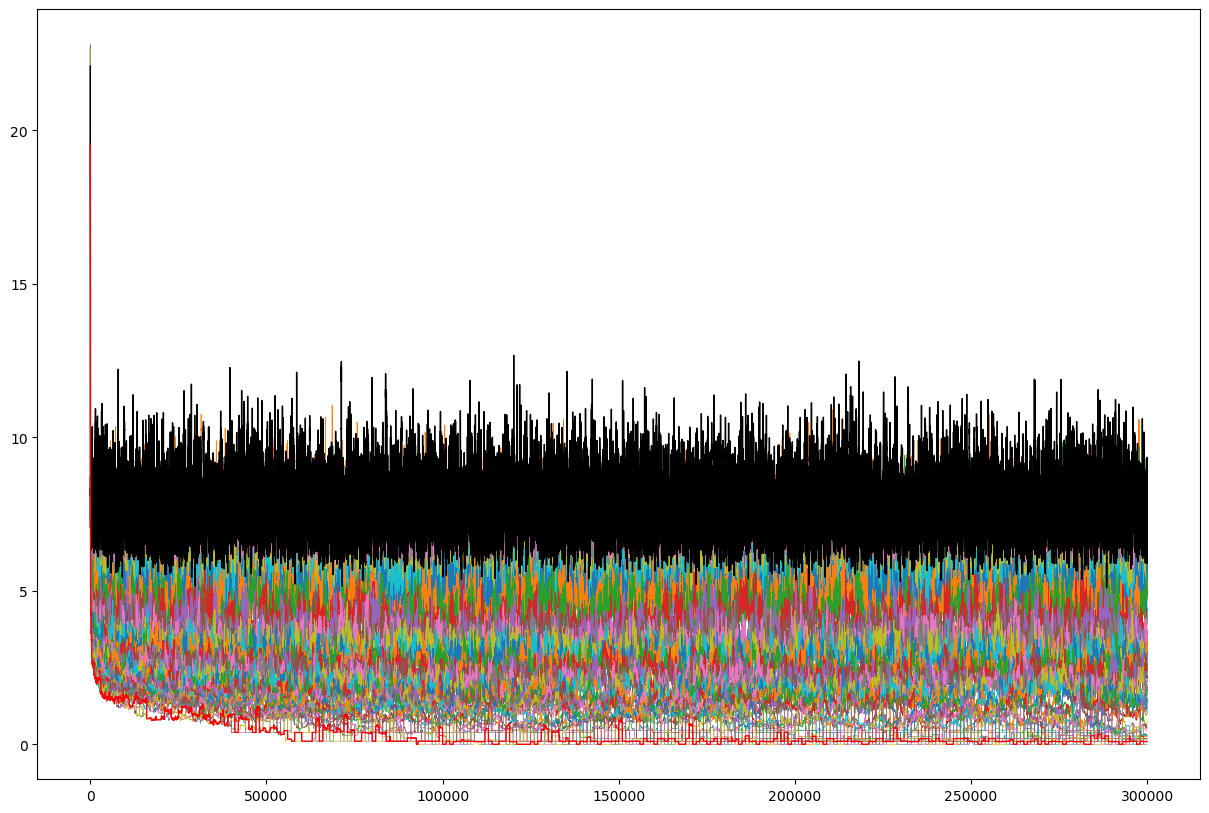

In [58]:
fig = plt.figure(figsize=(15, 10))
for b in betas:
    plt.plot(diffs_by_temp[b], linewidth=0.5)

plt.plot(diffs_by_temp[betas[0]], linewidth=1, color='k')
plt.plot(diffs_by_temp[betas[-1]], linewidth=1, color='r')

In [61]:
A1 = np.eye(N) - nx.normalized_laplacian_matrix(G)
#A1 = np.eye(N) - nx.directed_laplacian_matrix(G, walk_type='pagerank', alpha=0.85)
val1, vec1 = np.linalg.eigh(A1)


#beta=0
randomised_graphs = sampled_graphs[betas[0]]
vals = np.zeros((len(randomised_graphs), N))
for i in tqdm(range(len(randomised_graphs))):
    A3 = np.eye(N) - nx.normalized_laplacian_matrix(randomised_graphs[i])
    #A3 = np.eye(N) - nx.directed_laplacian_matrix(randomised_graphs[i], walk_type='pagerank', alpha=0.85)
    vals[i] = np.linalg.eigh(A3)[0]

val0 = np.mean(vals, axis=0)
std_vals0 = np.std(vals, axis=0)

#beta=20
randomised_graphs = sampled_graphs[betas[20]]
vals = np.zeros((len(randomised_graphs), N))
for i in tqdm(range(len(randomised_graphs))):
    A3 = np.eye(N) - nx.normalized_laplacian_matrix(randomised_graphs[i])
    #A3 = np.eye(N) - nx.directed_laplacian_matrix(randomised_graphs[i], walk_type='pagerank', alpha=0.85)
    vals[i] = np.linalg.eigh(A3)[0]

val20 = np.mean(vals, axis=0)
std_vals20 = np.std(vals, axis=0)

#beta=30
randomised_graphs = sampled_graphs[betas[30]]
vals = np.zeros((len(randomised_graphs), N))
for i in tqdm(range(len(randomised_graphs))):
    A3 = np.eye(N) - nx.normalized_laplacian_matrix(randomised_graphs[i])
    #A3 = np.eye(N) - nx.directed_laplacian_matrix(randomised_graphs[i], walk_type='pagerank', alpha=0.85)
    vals[i] = np.linalg.eigh(A3)[0]

val30 = np.mean(vals, axis=0)
std_vals30 = np.std(vals, axis=0)

#beta=50
randomised_graphs = sampled_graphs[betas[-1]]
vals = np.zeros((len(randomised_graphs), N))
for i in tqdm(range(len(randomised_graphs))):
    A3 = np.eye(N) - nx.normalized_laplacian_matrix(randomised_graphs[i])
    #A3 = np.eye(N) - nx.directed_laplacian_matrix(randomised_graphs[i], walk_type='pagerank', alpha=0.85)
    vals[i] = np.linalg.eigh(A3)[0]

val50 = np.mean(vals, axis=0)
std_vals50 = np.std(vals, axis=0)

100%|███████████████████████████████████████| 101/101 [00:00<00:00, 2436.78it/s]


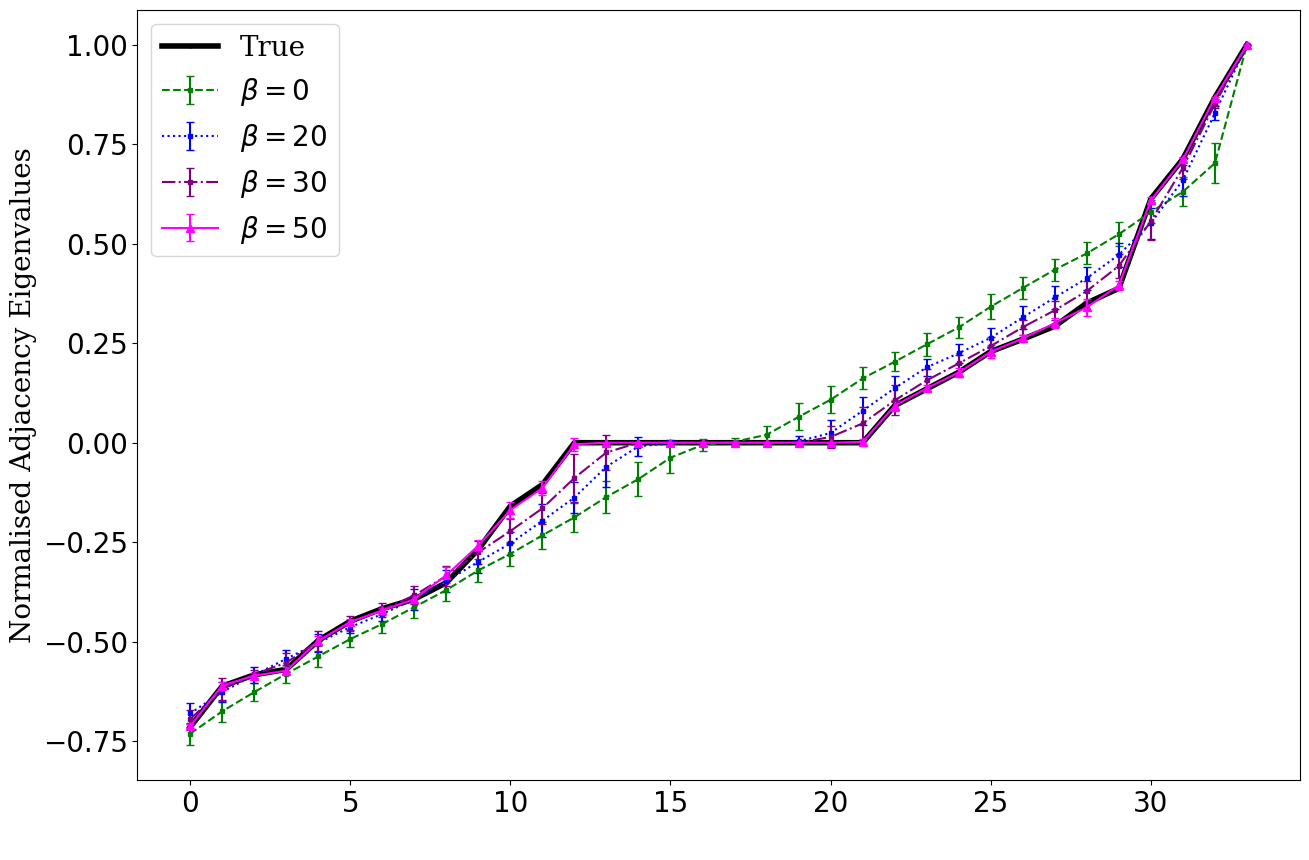

In [47]:
fig = plt.figure(figsize=(15, 10))
plt.plot(val1, 'k', label='True', marker='o', markersize=2, linewidth=4)

plt.errorbar(np.arange(N), val0, yerr = std_vals0, marker='s', capsize=3, markersize=3, linestyle='--', label=r'$\beta=0$', color='g')
plt.errorbar(np.arange(N), val20, yerr = std_vals20, marker='s', capsize=3, markersize=3, label=r'$\beta=20$', color='blue', linestyle='dotted')
plt.errorbar(np.arange(N), val30, yerr = std_vals30, marker='s', capsize=3, markersize=3, label=r'$\beta=30$', color='purple', linestyle='dashdot')
plt.errorbar(np.arange(N), val50, yerr = std_vals50, marker='^', capsize=3, markersize=6, label=r'$\beta=50$', color='magenta')


plt.legend(prop={'family':'serif', 'size':20})
plt.ylabel('Normalised Adjacency Eigenvalues', fontsize=20, font='serif')
plt.xlabel(' ', fontsize=20, font='serif')
plt.xticks(fontsize=20) ; plt.yticks(fontsize=20)

plt.savefig('KC_spectra final.pdf', bbox_inches='tight')

<Figure size 2000x1000 with 0 Axes>

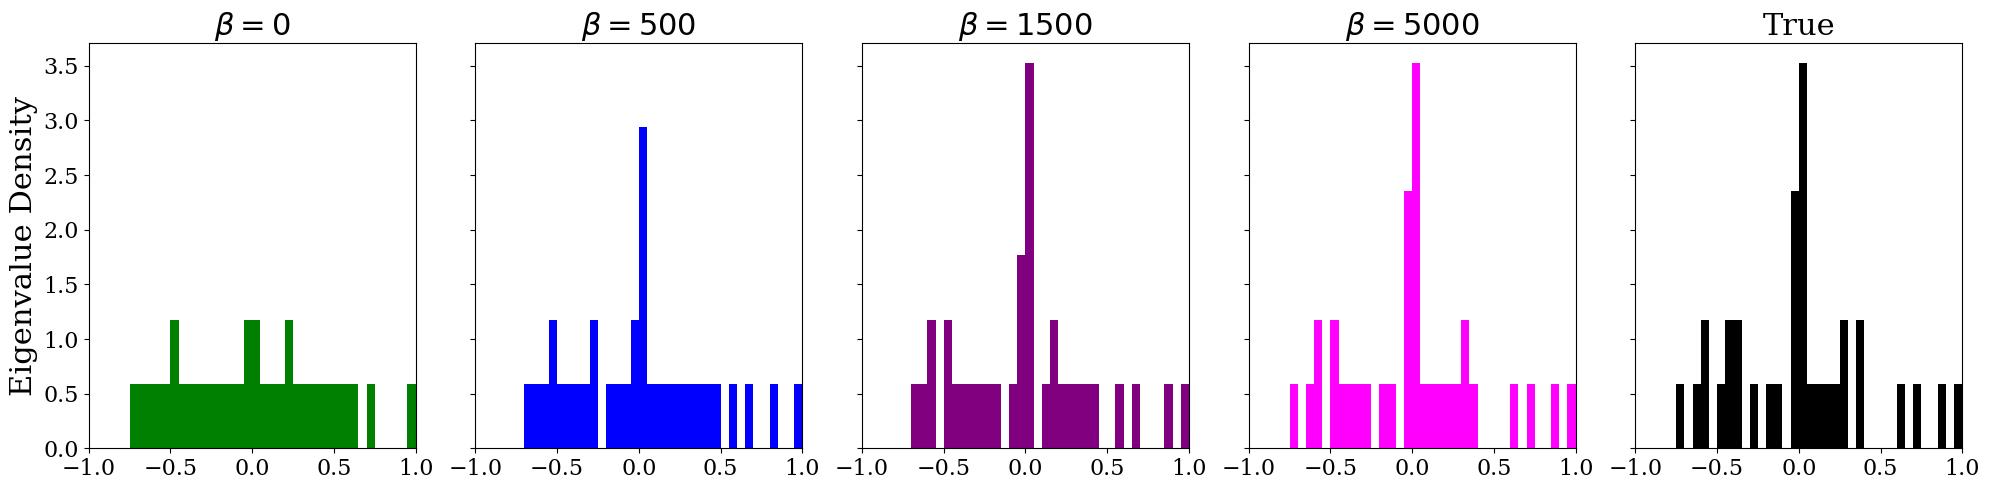

In [49]:
fig = plt.figure(figsize=(20, 10))
bins = 10

bins = np.linspace(-1, 1, 41)
datasets = [
    (r'$\beta=0$',    val0,    'g'),
    (r'$\beta=500$',  val20,  'b'),
    (r'$\beta=1500$', val30, 'purple'),
    (r'$\beta=5000$', val50, 'magenta'),
    ('True', val1, 'k')
]

fig, axes = plt.subplots(1, len(datasets), figsize=(20, 5), sharex=True, sharey=True)
for ax, (lab, arr, col) in zip(axes, datasets):
    ax.hist(arr, bins=bins, density=True, color=col)
    ax.set_title(lab, font='serif', fontsize=22)
    ax.set_xlim(-1, 1)
    #ax.set_xlabel('Eigenvalue', font='serif', fontsize=22)
    ax.tick_params(labelsize=16, labelfontfamily='serif')
axes[0].set_ylabel('Eigenvalue Density', font='serif', fontsize=22)
plt.tight_layout()
plt.show()

In [51]:
def CC_correlation(CCs, true):
    corr = np.corrcoef(true, CCs)[0, 1]
    return corr

correlations = np.zeros((len(betas), 3))

true = nx.clustering(G)

for i in tqdm(range(len(betas))):
    randomised_graphs = sampled_graphs[betas[i]]
    corrs = []
    for j in randomised_graphs:
        CC = nx.clustering(j)
        corrs.append(CC_correlation(list(CC.values()), list(true.values())))
        
    correlations[i, 0]  = np.median(corrs)
    correlations[i, 1:] = np.percentile(corrs, [25, 75])

100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 98.05it/s]


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

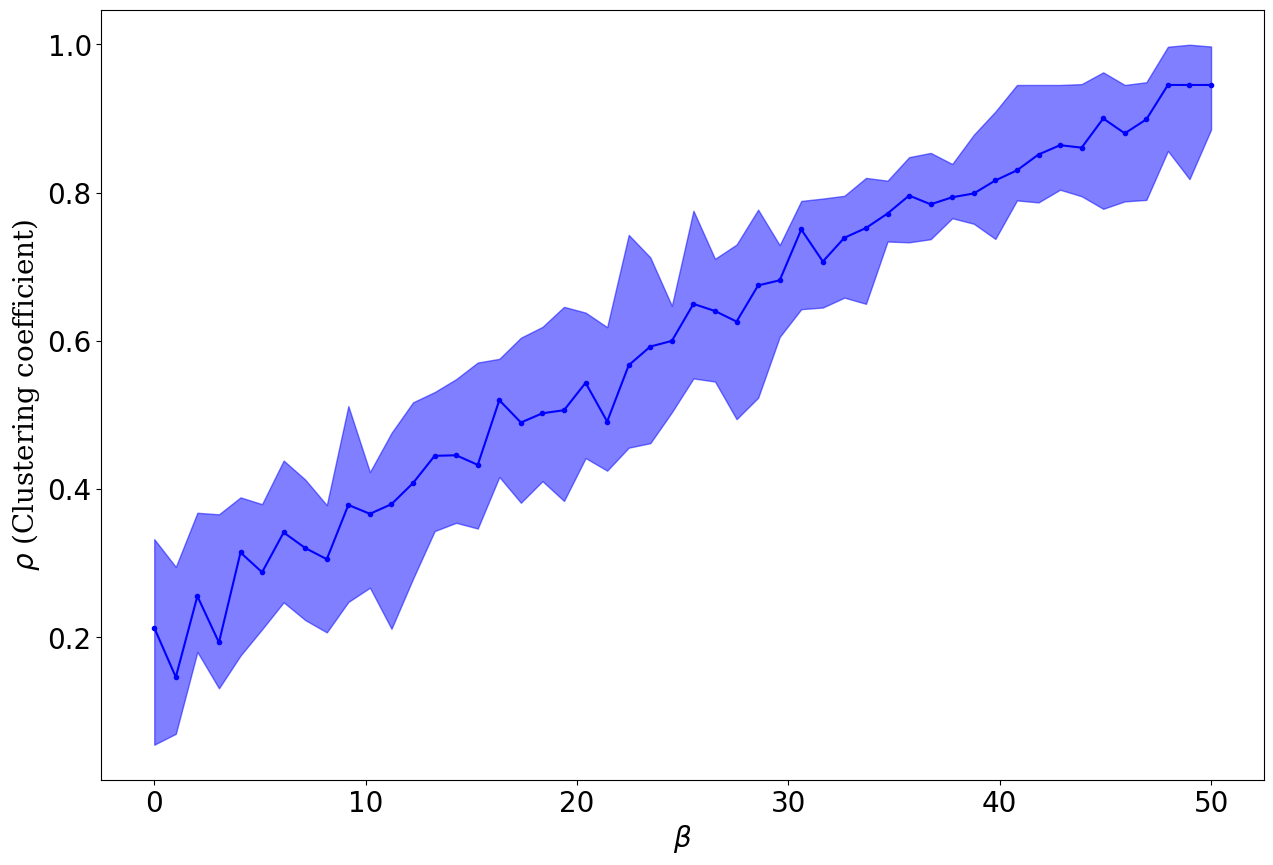

In [53]:
fig = plt.figure(figsize=(15, 10))
plt.plot(betas, correlations[:, 0], marker='.', color='b')


plt.fill_between(betas,
                 correlations[:, 1],
                 correlations[:, 2],
                 color='b',
                 alpha=0.5)

plt.xlabel(r'$\beta$', font='serif', fontsize=20)
plt.ylabel(r'$\rho$ (Clustering coefficient)', font='serif', fontsize=20)

plt.xticks(fontsize=20) ; plt.yticks(fontsize=20)

#plt.savefig('clustering_correlation_KC.pdf', bbox_inches='tight')

In [115]:
S0 = infinite_temp_entropy(np.array([degree for node, degree in G.degree]))
post_burn_in = {}
for b in betas:
    post_burn_in[b] = diffs_by_temp[b][-200000:]

In [117]:
entropies= compute_entropy_mean(post_burn_in, S0=S0)
Cs = compute_specific_heat_mean(post_burn_in)

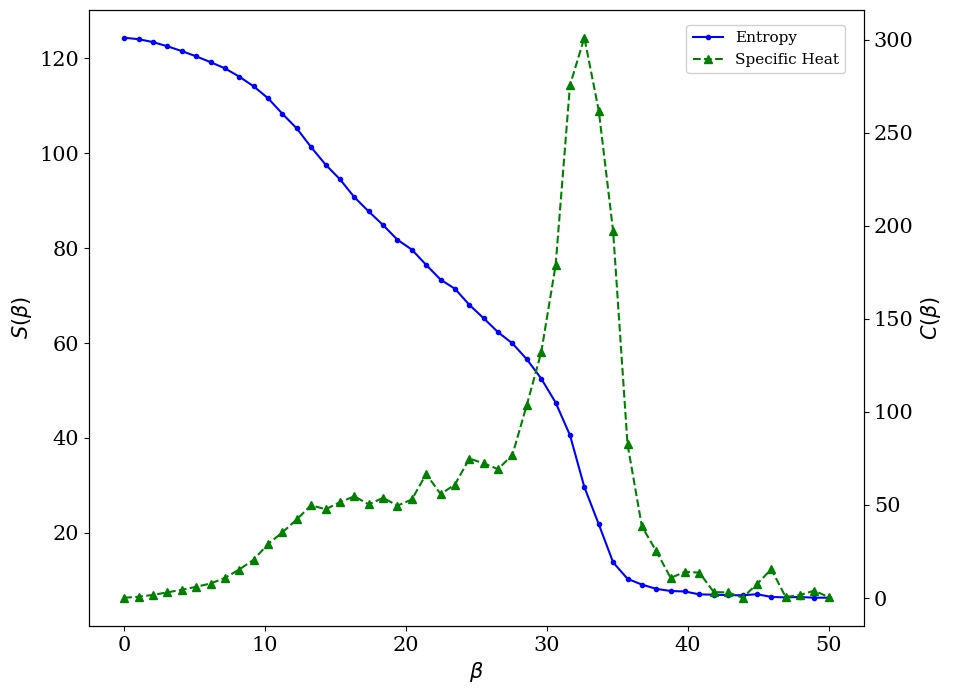

In [145]:
fig, ax1 = plt.subplots(figsize=(10,8))
 
ax1.plot(betas, np.where(np.array(list(entropies.values()))<0, 0,np.array(list(entropies.values()))) , marker='.', color='b', label='Entropy')
ax2 = ax1.twinx()  
ax2.plot(betas, np.where(np.array(list(Cs.values()))<0, 0,np.array(list(Cs.values()))), marker='^', color='g', label='Specific Heat', linestyle='--')
ax1.set_xlabel(r'$\beta$', fontsize=15, font='serif') 
ax1.set_ylabel(r'$S(\beta)$', fontsize=15, font='serif')
ax2.set_ylabel(r'$C(\beta)$', fontsize=15, font='serif')
#plt.plot(betas, np.array(list(entropies.values())) - np.array(list(entropies2.values())), marker='.', color= 'r')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

ax1.tick_params(axis='both', which='both', labelsize=15, labelfontfamily='serif')
ax2.tick_params(axis='both', which='both', labelsize=15, labelfontfamily='serif')

# single legend INSIDE the axes (top-left here)
ax1.legend(h1 + h2, l1 + l2,
           loc='upper right',          # corner inside the axes
           bbox_to_anchor=(0.98, 0.98),# slight inset from the top-right
           bbox_transform=ax1.transAxes,
           frameon=True, framealpha=0.9,
           borderaxespad=0.2, prop={'family':'serif', 'size':11} )
#ax1.grid()
#ax2.grid()

#plt.savefig('Entropy and SH.pdf', bbox_inches='tight')
